SARIMA

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
df = pd.read_csv("/content/Dataset- Superstore (2015-2018).csv")
sales_data = df[['Order Date', 'Sales']]

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Dataset- Superstore (2015-2018).csv'

PROPHET

In [ ]:
%pip install prophet

import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.3 MB 12.9 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 11.0 MB/s eta 0:00:01
   ---------------- ----------------------- 5.5/13.3 MB 9.8 MB/s eta 0:00:01
   ------------------------ --------------- 8.1/13.3 MB 10.0 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 8.1 MB/s  0:00:01
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.4 MB/s  0:00:00

   ----------

C:\Users\srinivas.m\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
url = ("https://raw.githubusercontent.com/rahulhegde99"
      "/Time-Series-Analysis-and-Forecasting-of-Air-Passengers"
        "/master/airpassengers.csv")
data = pd.read_csv(url)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
m = Prophet()
m.fit(df)

22:26:53 - cmdstanpy - INFO - Chain [1] start processing
22:26:57 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=12 * 5,freq='M')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,722.664453,690.583909,751.611871,655.842215,649.128176,662.386969
200,1965-08-31,676.247240,647.981088,706.897833,658.959610,652.089661,665.700330
201,1965-09-30,639.431867,607.492222,667.392781,661.976443,654.893824,668.887043
202,1965-10-31,609.386652,581.797229,639.220791,665.093838,657.811296,672.248872
203,1965-11-30,639.042990,609.345736,667.846217,668.110672,660.637625,675.461907


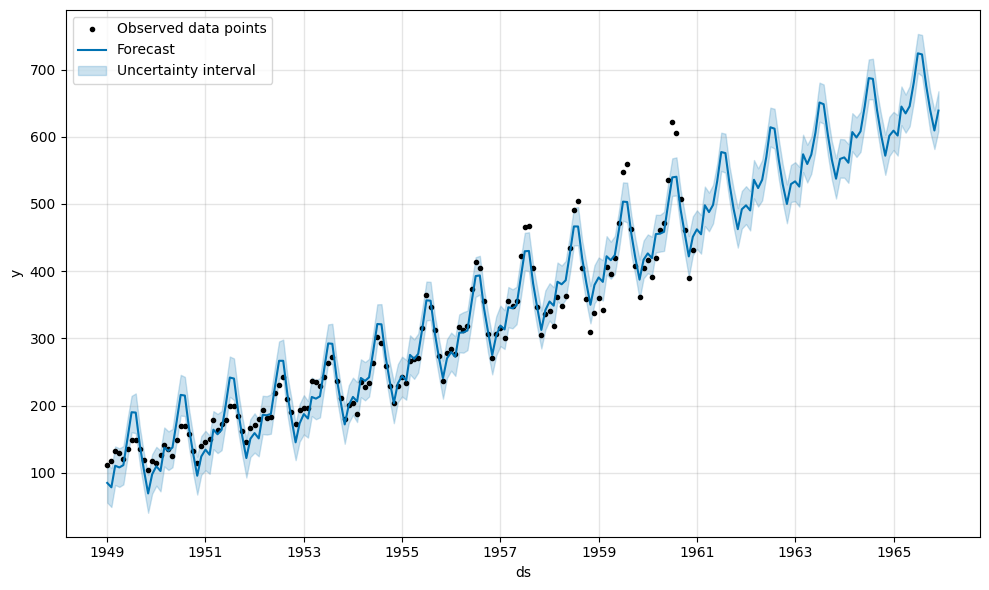

In [ ]:
fig1 = m.plot(forecast, include_legend=True)

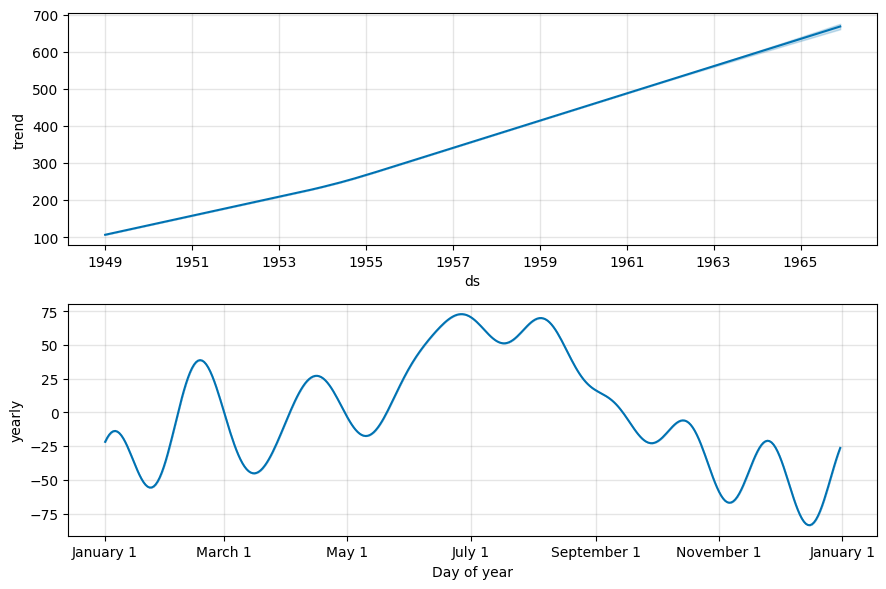

In [ ]:
fig2 = m.plot_components(forecast)

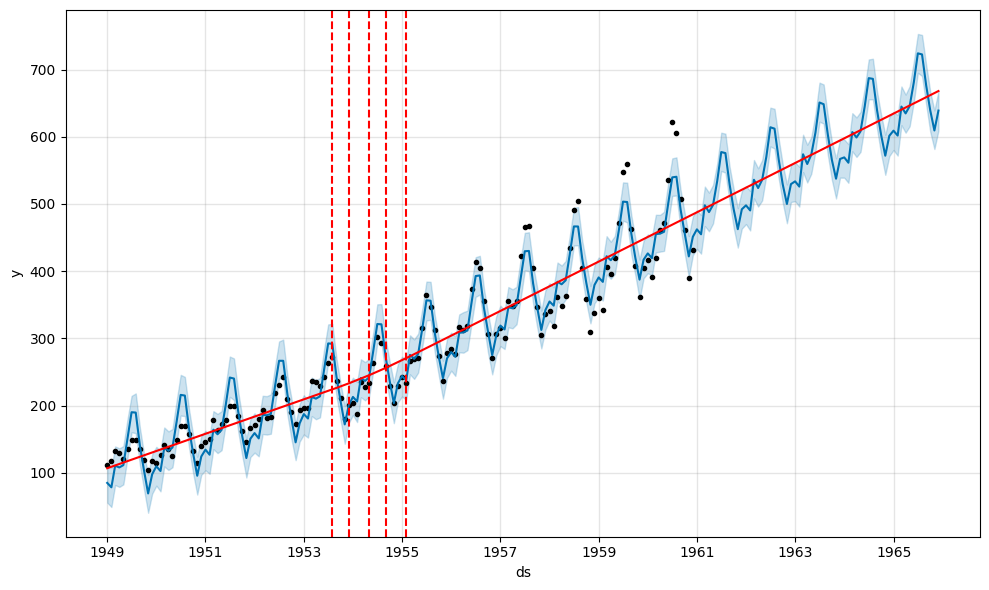

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m, forecast)

EXPONENTIAL SMOOTHENING